In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('TCS.csv', header = 0)
print(df.head())
print(df.shape)

         Date         Open         High          Low        Close  \
0  2021-08-04  3300.000000  3305.199951  3261.199951  3273.949951   
1  2021-08-05  3275.000000  3315.000000  3262.500000  3283.949951   
2  2021-08-06  3272.550049  3324.000000  3265.000000  3309.800049   
3  2021-08-09  3323.899902  3337.000000  3310.000000  3322.699951   
4  2021-08-10  3315.600098  3349.899902  3315.600098  3333.899902   

     Adj Close     Volume  
0  3231.592529  2929598.0  
1  3241.463135  2534521.0  
2  3266.978516  2292362.0  
3  3279.711670  1510489.0  
4  3290.766602  2040777.0  
(251, 7)


In [4]:
df = df.dropna()
print(df.shape)

(250, 7)


In [5]:
df['Close'].unique()

array([3273.949951, 3283.949951, 3309.800049, 3322.699951, 3333.899902,
       3344.199951, 3351.75    , 3463.399902, 3472.949951, 3553.050049,
       3560.550049, 3559.5     , 3637.399902, 3613.199951, 3659.      ,
       3671.850098, 3720.149902, 3701.300049, 3786.449951, 3714.949951,
       3836.75    , 3842.050049, 3852.      , 3815.899902, 3774.149902,
       3791.399902, 3845.350098, 3885.899902, 3954.550049, 3903.300049,
       3827.850098, 3823.5     , 3862.949951, 3862.149902, 3869.25    ,
       3871.300049, 3836.949951, 3779.149902, 3791.899902, 3775.550049,
       3730.199951, 3773.300049, 3833.300049, 3810.899902, 3892.899902,
       3935.649902, 3685.600098, 3652.850098, 3655.199951, 3611.449951,
       3647.149902, 3634.149902, 3608.850098, 3532.5     , 3498.850098,
       3492.949951, 3482.600098, 3489.75    , 3421.649902, 3397.75    ,
       3476.399902, 3484.199951, 3492.25    , 3508.649902, 3502.75    ,
       3505.699951, 3484.300049, 3488.199951, 3526.050049, 3553.

In [6]:
df1 = df['Close']
print(df1.head())

0    3273.949951
1    3283.949951
2    3309.800049
3    3322.699951
4    3333.899902
Name: Close, dtype: float64


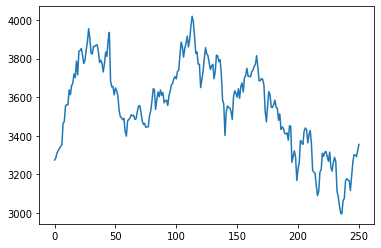

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
# LSTM are very sentivie to the scale of the data, so need to transform the data 
# Here will apply mon-max scaler
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1)) 
# Shape is the for 2-D no. of rows x no. of colums - [ [ 1,2,3], [4,5,6]] - shape will be (2 x 3)
print(df1)

[[0.2726562 ]
 [0.28241658]
 [0.30764727]
 [0.32023807]
 [0.33116965]
 [0.3412229 ]
 [0.34859204]
 [0.45756663]
 [0.46688785]
 [0.54506862]
 [0.55238891]
 [0.55136402]
 [0.62739732]
 [0.60377724]
 [0.64847985]
 [0.66102204]
 [0.7081645 ]
 [0.68976632]
 [0.7728759 ]
 [0.70308915]
 [0.82197068]
 [0.82714373]
 [0.83685527]
 [0.80162019]
 [0.76087058]
 [0.77770724]
 [0.83036471]
 [0.86994288]
 [0.93694806]
 [0.88692609]
 [0.81328404]
 [0.80903817]
 [0.84754284]
 [0.84676196]
 [0.85369193]
 [0.85569286]
 [0.82216584]
 [0.76575077]
 [0.77819526]
 [0.76223718]
 [0.71797374]
 [0.76004109]
 [0.8186034 ]
 [0.79673999]
 [0.87677515]
 [0.91850079]
 [0.67444257]
 [0.64247731]
 [0.64477085]
 [0.60206917]
 [0.6369137 ]
 [0.6242252 ]
 [0.59953162]
 [0.52501099]
 [0.49216739]
 [0.48640862]
 [0.47630676]
 [0.48328534]
 [0.41681703]
 [0.3934898 ]
 [0.47025513]
 [0.47786828]
 [0.48572544]
 [0.50173237]
 [0.49597384]
 [0.49885311]
 [0.47796598]
 [0.48177243]
 [0.51871559]
 [0.54531263]
 [0.54833821]
 [0.51

In [9]:
# Train - test split
# Cross validation, random seed works well when we have classification or regression problem
# Above methods are not applicable for the time series data

train_data, test_data = df1[0:220, :], df1[220:250,:]

In [10]:
import numpy 
# Convert an array of value into dataset matrix

def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step) , 0] # O/p will get list as slicing the array
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0]) # will get single o/p
    return np.array(dataX), np.array(dataY)

In [11]:
# Train - test
x_train, y_train = create_dataset(train_data, 5)
x_test, y_test = create_dataset(test_data, 5)

print(x_train)

[[0.2726562  0.28241658 0.30764727 0.32023807 0.33116965]
 [0.28241658 0.30764727 0.32023807 0.33116965 0.3412229 ]
 [0.30764727 0.32023807 0.33116965 0.3412229  0.34859204]
 ...
 [0.35654665 0.21960865 0.21077545 0.20662729 0.14386797]
 [0.21960865 0.21077545 0.20662729 0.14386797 0.09204023]
 [0.21077545 0.20662729 0.14386797 0.09204023 0.11497714]]


In [12]:
print(x_train.shape, y_train.shape, x_test.shape, x_test.shape)

(214, 5) (214,) (24, 5) (24, 5)


In [13]:
# Reshape input to be in [sample, timesteps, features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print(x_train)

[[[0.2726562 ]
  [0.28241658]
  [0.30764727]
  [0.32023807]
  [0.33116965]]

 [[0.28241658]
  [0.30764727]
  [0.32023807]
  [0.33116965]
  [0.3412229 ]]

 [[0.30764727]
  [0.32023807]
  [0.33116965]
  [0.3412229 ]
  [0.34859204]]

 ...

 [[0.35654665]
  [0.21960865]
  [0.21077545]
  [0.20662729]
  [0.14386797]]

 [[0.21960865]
  [0.21077545]
  [0.20662729]
  [0.14386797]
  [0.09204023]]

 [[0.21077545]
  [0.20662729]
  [0.14386797]
  [0.09204023]
  [0.11497714]]]


In [15]:
# Create the satcked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [16]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (5,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error', optimizer = 'adam')

In [159]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 5, 50)             10400     
                                                                 
 lstm_8 (LSTM)               (None, 5, 50)             20200     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [160]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 500, batch_size = 50, verbose = 1)

Epoch 1/500
5/5 [==============================] - 13s 623ms/step - loss: 0.3507 - val_loss: 0.0190
Epoch 2/500
5/5 [==============================] - 0s 30ms/step - loss: 0.2099 - val_loss: 0.0085
Epoch 3/500
5/5 [==============================] - 0s 33ms/step - loss: 0.0630 - val_loss: 0.0538
Epoch 4/500
5/5 [==============================] - 0s 35ms/step - loss: 0.0326 - val_loss: 0.1028
Epoch 5/500
5/5 [==============================] - 0s 40ms/step - loss: 0.0295 - val_loss: 0.0493
Epoch 6/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0162 - val_loss: 0.0292
Epoch 7/500
5/5 [==============================] - 0s 37ms/step - loss: 0.0233 - val_loss: 0.0338
Epoch 8/500
5/5 [==============================] - 0s 37ms/step - loss: 0.0158 - val_loss: 0.0501
Epoch 9/500
5/5 [==============================] - 0s 38ms/step - loss: 0.0132 - val_loss: 0.0611
Epoch 10/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0146 - val_loss: 0.0528
Epoch 11/500
5/5 

Epoch 84/500
5/5 [==============================] - 0s 30ms/step - loss: 0.0080 - val_loss: 0.0121
Epoch 85/500
5/5 [==============================] - 0s 38ms/step - loss: 0.0082 - val_loss: 0.0145
Epoch 86/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0083 - val_loss: 0.0114
Epoch 87/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0080 - val_loss: 0.0134
Epoch 88/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0077 - val_loss: 0.0122
Epoch 89/500
5/5 [==============================] - 0s 38ms/step - loss: 0.0076 - val_loss: 0.0127
Epoch 90/500
5/5 [==============================] - 0s 39ms/step - loss: 0.0077 - val_loss: 0.0124
Epoch 91/500
5/5 [==============================] - 0s 27ms/step - loss: 0.0076 - val_loss: 0.0119
Epoch 92/500
5/5 [==============================] - 0s 38ms/step - loss: 0.0076 - val_loss: 0.0125
Epoch 93/500
5/5 [==============================] - 0s 37ms/step - loss: 0.0076 - val_loss: 0.0118
Epoch 94/5

5/5 [==============================] - 0s 30ms/step - loss: 0.0054 - val_loss: 0.0079
Epoch 167/500
5/5 [==============================] - 0s 37ms/step - loss: 0.0053 - val_loss: 0.0088
Epoch 168/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0057 - val_loss: 0.0082
Epoch 169/500
5/5 [==============================] - 0s 37ms/step - loss: 0.0050 - val_loss: 0.0078
Epoch 170/500
5/5 [==============================] - 0s 38ms/step - loss: 0.0048 - val_loss: 0.0080
Epoch 171/500
5/5 [==============================] - 0s 34ms/step - loss: 0.0045 - val_loss: 0.0079
Epoch 172/500
5/5 [==============================] - 0s 35ms/step - loss: 0.0045 - val_loss: 0.0085
Epoch 173/500
5/5 [==============================] - 0s 35ms/step - loss: 0.0050 - val_loss: 0.0078
Epoch 174/500
5/5 [==============================] - 0s 29ms/step - loss: 0.0051 - val_loss: 0.0079
Epoch 175/500
5/5 [==============================] - 0s 25ms/step - loss: 0.0045 - val_loss: 0.0085
Epoch 176/500


5/5 [==============================] - 0s 36ms/step - loss: 0.0038 - val_loss: 0.0064
Epoch 249/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0035 - val_loss: 0.0059
Epoch 250/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0035 - val_loss: 0.0061
Epoch 251/500
5/5 [==============================] - 0s 35ms/step - loss: 0.0033 - val_loss: 0.0060
Epoch 252/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0034 - val_loss: 0.0059
Epoch 253/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0034 - val_loss: 0.0061
Epoch 254/500
5/5 [==============================] - 0s 37ms/step - loss: 0.0033 - val_loss: 0.0058
Epoch 255/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0033 - val_loss: 0.0058
Epoch 256/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0032 - val_loss: 0.0058
Epoch 257/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0033 - val_loss: 0.0061
Epoch 258/500


5/5 [==============================] - 0s 22ms/step - loss: 0.0030 - val_loss: 0.0050
Epoch 331/500
5/5 [==============================] - 0s 24ms/step - loss: 0.0032 - val_loss: 0.0046
Epoch 332/500
5/5 [==============================] - 0s 35ms/step - loss: 0.0038 - val_loss: 0.0051
Epoch 333/500
5/5 [==============================] - 0s 41ms/step - loss: 0.0032 - val_loss: 0.0048
Epoch 334/500
5/5 [==============================] - 0s 35ms/step - loss: 0.0029 - val_loss: 0.0048
Epoch 335/500
5/5 [==============================] - 0s 33ms/step - loss: 0.0029 - val_loss: 0.0047
Epoch 336/500
5/5 [==============================] - 0s 34ms/step - loss: 0.0029 - val_loss: 0.0047
Epoch 337/500
5/5 [==============================] - 0s 28ms/step - loss: 0.0032 - val_loss: 0.0053
Epoch 338/500
5/5 [==============================] - 0s 17ms/step - loss: 0.0035 - val_loss: 0.0047
Epoch 339/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0029 - val_loss: 0.0050
Epoch 340/500


5/5 [==============================] - 0s 38ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 413/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0034 - val_loss: 0.0049
Epoch 414/500
5/5 [==============================] - 0s 37ms/step - loss: 0.0034 - val_loss: 0.0043
Epoch 415/500
5/5 [==============================] - 0s 37ms/step - loss: 0.0031 - val_loss: 0.0047
Epoch 416/500
5/5 [==============================] - 0s 38ms/step - loss: 0.0031 - val_loss: 0.0043
Epoch 417/500
5/5 [==============================] - 0s 37ms/step - loss: 0.0031 - val_loss: 0.0046
Epoch 418/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0029 - val_loss: 0.0042
Epoch 419/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0030 - val_loss: 0.0048
Epoch 420/500
5/5 [==============================] - 0s 35ms/step - loss: 0.0031 - val_loss: 0.0043
Epoch 421/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0029 - val_loss: 0.0045
Epoch 422/500


5/5 [==============================] - 0s 40ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 495/500
5/5 [==============================] - 0s 30ms/step - loss: 0.0032 - val_loss: 0.0044
Epoch 496/500
5/5 [==============================] - 0s 23ms/step - loss: 0.0033 - val_loss: 0.0039
Epoch 497/500
5/5 [==============================] - 0s 38ms/step - loss: 0.0029 - val_loss: 0.0044
Epoch 498/500
5/5 [==============================] - 0s 35ms/step - loss: 0.0031 - val_loss: 0.0038
Epoch 499/500
5/5 [==============================] - 0s 36ms/step - loss: 0.0034 - val_loss: 0.0043
Epoch 500/500
5/5 [==============================] - 0s 35ms/step - loss: 0.0029 - val_loss: 0.0039


In [162]:
# Predicting 
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

1/1 [==============================] - 0s 37ms/step


In [163]:
# Transforming back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

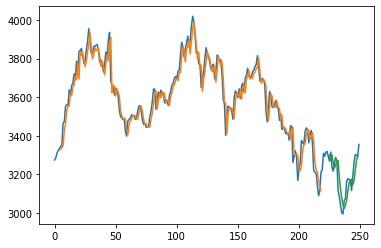

In [164]:
# Plotting

# Shift the train prediction for plotting
look_back = 5
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test prediction for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back*2) + 1 : len(df1) -1, :] = test_predict

# Plot baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [165]:

y = (x_test)[23,:]
pred = (model.predict(x_test)[23,:])

1/1 [==============================] - 0s 41ms/step


In [166]:
pred = scaler.inverse_transform(pred.reshape(-1,1))
print(pred)

[[3293.2144]]


In [167]:
len(test_data)

30

In [168]:
x_input = test_data[25:].reshape(-1,1)
print(x_input)

[[0.25952853]
 [0.29993642]
 [0.29691085]
 [0.29007858]
 [0.35137384]]


In [169]:
temp_input = x_input.flatten().tolist()
temp_input

[0.2595285275170478,
 0.29993642358844275,
 0.2969108478790945,
 0.2900785787471585,
 0.35137384107098013]

In [170]:
# Prediction for next 5 days
from numpy import array

ls_out = []
n_step = 5
i = 0
while i<30 :
    
    if (len(temp_input)>5):
        x_input = np.array(temp_input[1:])
        print('{0} day input {1}'.format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape(1, n_step, 1)
        pred = model.predict(x_input, verbose = 0)
        print('{0} day close {1}'. format(i, pred))
        temp_input.extend(pred[0].tolist())
        temp_input = temp_input[1:]
        ls_out.extend(pred.tolist())
        i+=1
    
    else:
        x_input = x_input.reshape(1, n_step, 1)
        pred = model.predict(x_input, verbose = 0)
        print(pred[0])
        temp_input.extend(pred[0].tolist())
        print(len(temp_input))
        ls_out.extend(pred.tolist())
        i+=1
print(ls_out)

[0.3295592]
6
1 day input [0.29993642 0.29691085 0.29007858 0.35137384 0.32955921]
1 day close [[0.3306384]]
2 day input [0.29691085 0.29007858 0.35137384 0.32955921 0.33063841]
2 day close [[0.3310705]]
3 day input [0.29007858 0.35137384 0.32955921 0.33063841 0.33107051]
3 day close [[0.33079106]]
4 day input [0.35137384 0.32955921 0.33063841 0.33107051 0.33079106]
4 day close [[0.32991707]]
5 day input [0.32955921 0.33063841 0.33107051 0.33079106 0.32991707]
5 day close [[0.32953]]
6 day input [0.33063841 0.33107051 0.33079106 0.32991707 0.32953   ]
6 day close [[0.32903615]]
7 day input [0.33107051 0.33079106 0.32991707 0.32953    0.32903615]
7 day close [[0.3285391]]
8 day input [0.33079106 0.32991707 0.32953    0.32903615 0.3285391 ]
8 day close [[0.32805207]]
9 day input [0.32991707 0.32953    0.32903615 0.3285391  0.32805207]
9 day close [[0.32757437]]
10 day input [0.32953    0.32903615 0.3285391  0.32805207 0.32757437]
10 day close [[0.327099]]
11 day input [0.32903615 0.32853

In [171]:
pred = array(ls_out)
close = scaler.inverse_transform(pred.reshape(-1,1)) # Reshape can be only used with the array not with list
print(close)

[[3332.2499189 ]
 [3333.35561479]
 [3333.79832673]
 [3333.51200975]
 [3332.61657073]
 [3332.21999562]
 [3331.71401731]
 [3331.20477186]
 [3330.70578583]
 [3330.21635693]
 [3329.72930967]
 [3329.24803334]
 [3328.77206992]
 [3328.3011446 ]
 [3327.83537952]
 [3327.37468307]
 [3326.91896367]
 [3326.4683129 ]
 [3326.0225781 ]
 [3325.5817898 ]
 [3325.1457648 ]
 [3324.7145947 ]
 [3324.28824897]
 [3323.8665444 ]
 [3323.44960313]
 [3323.03733355]
 [3322.62955247]
 [3322.22647361]
 [3321.82788325]
 [3321.43372032]]


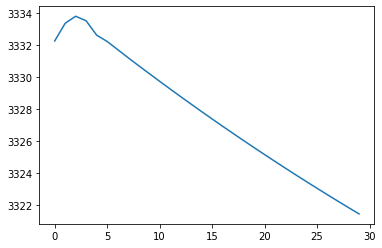

In [172]:
df4 = pd.DataFrame(close, columns = ['close'])
plt.plot(df4 )
